# Predict house price 
The data is located in "./Data/data2.txt", the first column is the house size, the second column is the number of bedrooms, and the third column is the house price.

In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt

## 1.Read

In [2]:
data = pd.read_csv("../Data/data2.txt", header=None, names=['Size', 'Bedrooms', 'Price'])
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


# 2.Mean variance normalization  
  
$x_i=\frac{(x_i-\mu_i)}{\sigma_i}$

In [3]:
data = (data - data.mean()) / data.std()
data.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


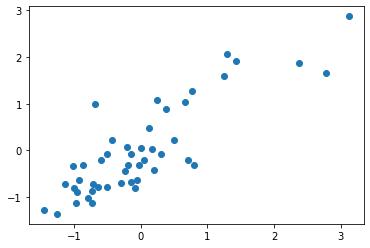

In [4]:
plt.scatter(data.iloc[:,0],data.iloc[:,-1])
plt.show()

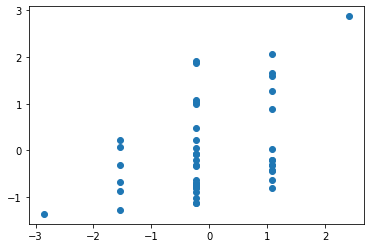

In [5]:
plt.scatter(data.iloc[:,1],data.iloc[:,-1])
plt.show()

## 3.Gradient Descent
### 3.1 Implement the cost function$J(θ_0,θ_1)$ 
$J(θ_0,θ_1)=\frac{1}{2m}\sum\limits_{i=1}\limits^m(h_θ(x^{(i)})-y^{(i)})^2$ 

In [6]:
def ComputeCost(X,Y,Theta):
    """
    X:n-dimensional matrix, input
    Y:n-dimensional matrix, output
    Theta:n-dimensional matrix,parameter
    """
    SSME=np.power(X*Theta.T-Y,2) #compute square of modeling error
    return np.sum(SSME)/(2*len(X))

### 3.2 Implement gradient descent
$repeat ~ until ~ convergence \lbrace$  
$θ_0:=θ_0-\frac{\alpha}{m}\sum\limits_{i=1}\limits^m(h_θ(x^{(i)})-y^{(i)})$  
$θ_1:=θ_1-\frac{\alpha}{m}\sum\limits_{i=1}\limits^m[(h_θ(x^{(i)})-y^{(i)})x_1^{(i)}]$  
$θ_2:=θ_2-\frac{\alpha}{m}\sum\limits_{i=1}\limits^m[(h_θ(x^{(i)})-y^{(i)})x_2^{(i)}]$  
$\rbrace$

In [7]:
def GradientDescent(X,Y,Theta,alpha,iters):
    """
    X:n-dimensional matrix, input
    Y:n-dimensional matrix, output
    Theta:n-dimensional matrix,parameter
    alpha:learning rate
    iters:number of iterations
    """
    temp=np.mat([0.0,0.0])
    theta_0=[0.0]
    theta_1=[0.0]
    for i in range(iters):
        error = (X*Theta.T-Y)
        for j in range(2):
            term=np.multiply(error,X[:,j])
            temp[0,j]=Theta[0,j]-((alpha/len(X))*np.sum(term))
        Theta=temp
        theta_0.append(Theta[0,0])
        theta_1.append(Theta[0,1])
        cost=ComputeCost(X,Y,Theta)
    return Theta,cost,theta_0,theta_1

### 3.3 run

In [8]:
X=np.mat(data.iloc[:,:-1].values)
Y=np.mat(data.iloc[:,-1].values).T
Theta = np.mat([0,0])
alpha=0.01
iters=1500
parameters,cost,theta_0,theta_1=GradientDescent(X,Y,Theta,alpha,iters)
print("Fitted Curve Parameters:",parameters)
print("cost:",cost)

Fitted Curve Parameters: [[ 0.88404235 -0.05245518]]
cost: 0.13068670606095903


## 4.Attachment: loss

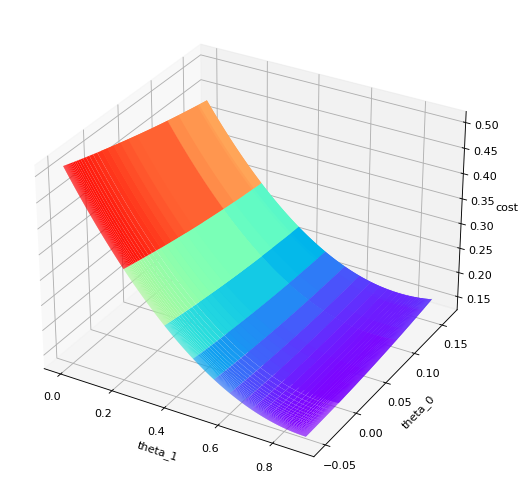

In [9]:
cost_t=np.mat(np.zeros((len(theta_0),len(theta_1))))
for i in range(len(theta_0)):
    for j in range(len(theta_1)):
        SSME=np.power(X*np.mat([theta_0[i],theta_1[j]]).T-Y,2) #compute square of modeling error
        cost_t[i,j]=np.sum(SSME)/(2*len(X))
theta_1,theta_0=np.meshgrid(theta_1,theta_0)
#print(theta_0)
#print(theta_1)
#print(cost_t)
pl = plt.figure(figsize=(8,6),dpi=80)
ax=Axes3D(pl,auto_add_to_figure=False)
pl.add_axes(ax)
ax.plot_surface(theta_0,theta_1,cost_t,cmap=plt.get_cmap('rainbow'))
ax.set_xlabel('theta_1')
ax.set_ylabel('theta_0')
ax.set_zlabel('cost')
plt.show()

## 5.Normal Equation
$\Theta=(X^TX)^{-1}X^TY$

In [10]:
def normalEqn(X,Y):
    Theta2 = np.linalg.pinv(X.T*X)*X.T*Y
    return Theta2

In [11]:
parameters=normalEqn(X,Y)
cost=ComputeCost(X,Y,parameters.T)
print("Fitted Curve Parameters:",parameters)
print("cost:",cost)

Fitted Curve Parameters: [[ 0.88476599]
 [-0.05317882]]
cost: 0.13068648053904197
